In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-housing-dataset/BostonHousing.csv


In [3]:
df=pd.read_csv("/kaggle/input/boston-housing-dataset/BostonHousing.csv")

In [4]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
df['rm']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 506, dtype: float64

In [7]:
mean_rm=df['rm'].mean()

In [8]:
mean_rm

6.28434131736527

In [9]:
df['rm']=df['rm'].fillna(mean_rm)

In [10]:
df['rm'].isnull().sum()

0

In [12]:
df['rm']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: rm, Length: 506, dtype: float64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



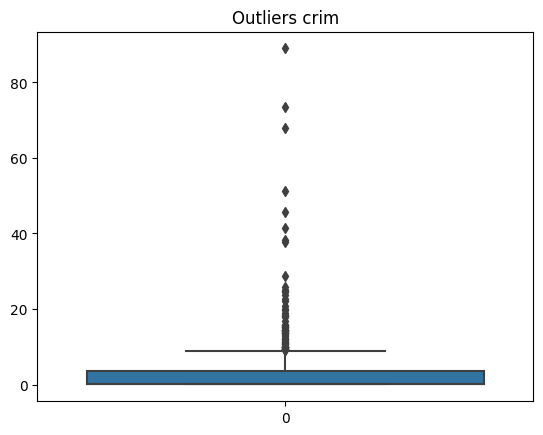

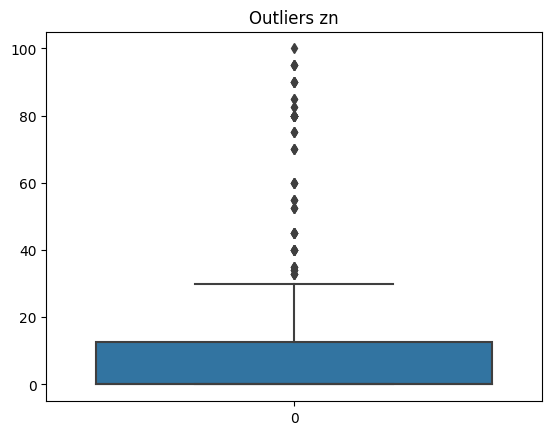

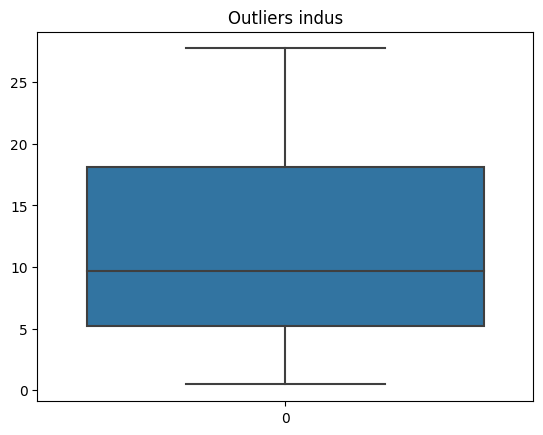

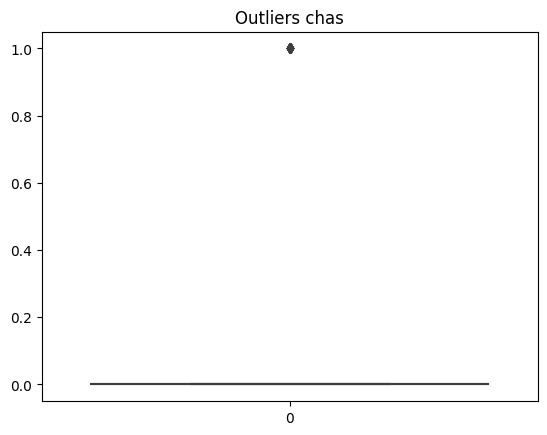

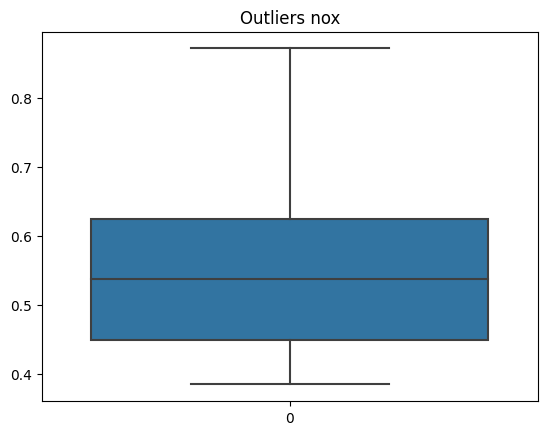

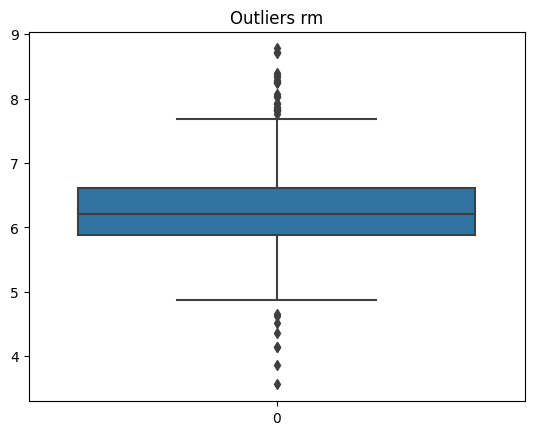

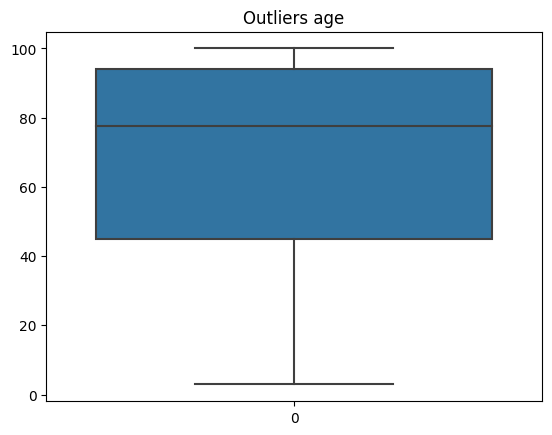

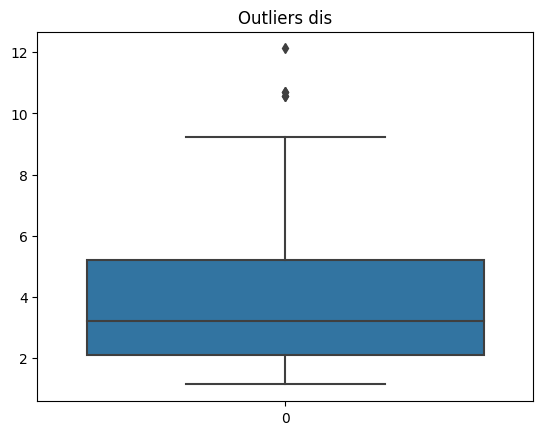

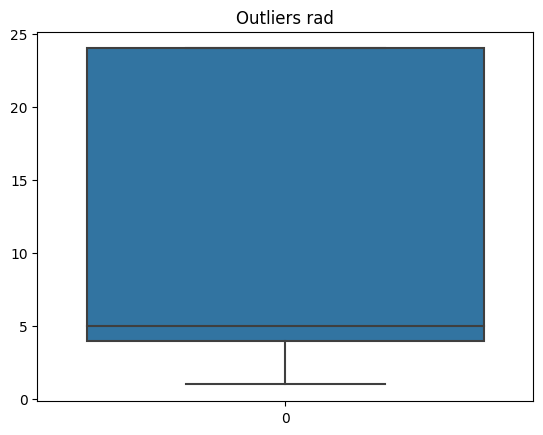

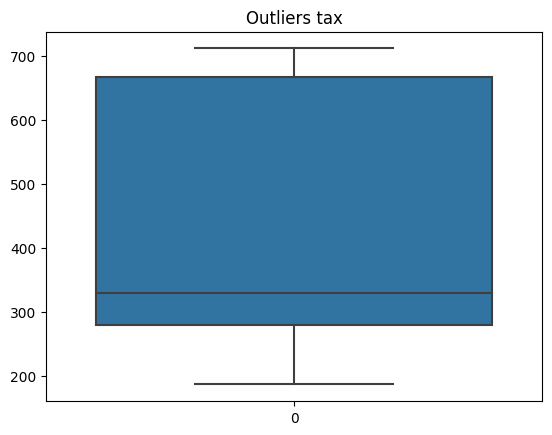

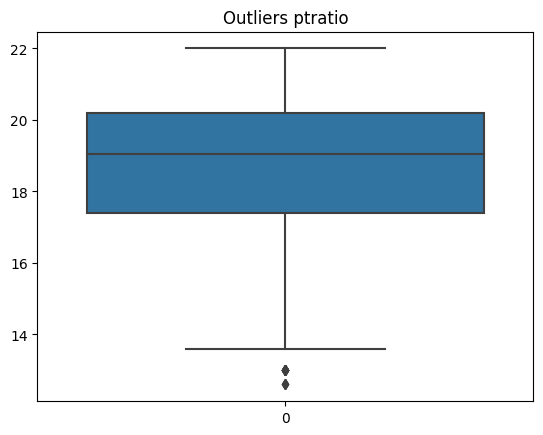

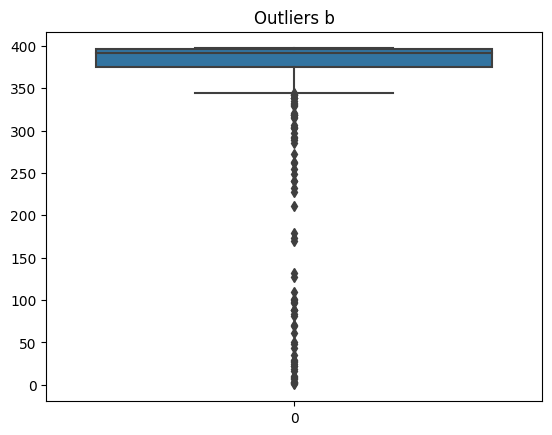

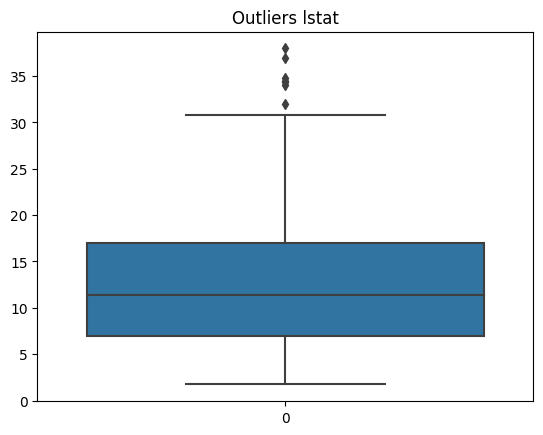

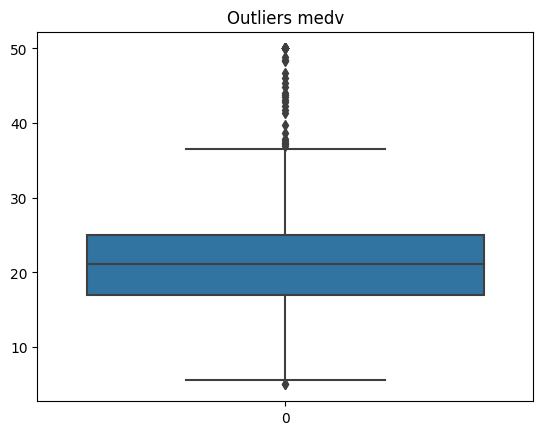

In [16]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.title('Outliers {}'.format(i))
    plt.show()

Remove Outlier Using IQR Method


In [17]:
df_cap=df.copy()

In [18]:
def Capping_IQR(df,cols,factor):
    
    for i in cols:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        
        IQR=q3-q1
        
        upper=q3+(1.5*IQR)
        lower=q1-(1.5*IQR)
        
        df[i]=np.where(df[i]>upper,upper,np.where(df[i]<lower,lower,df[i]))

In [19]:
Capping_IQR(df_cap,df_cap.columns,1.5)

/tmp/ipykernel_43/3096991670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
/tmp/ipykernel_43/3096991670.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))


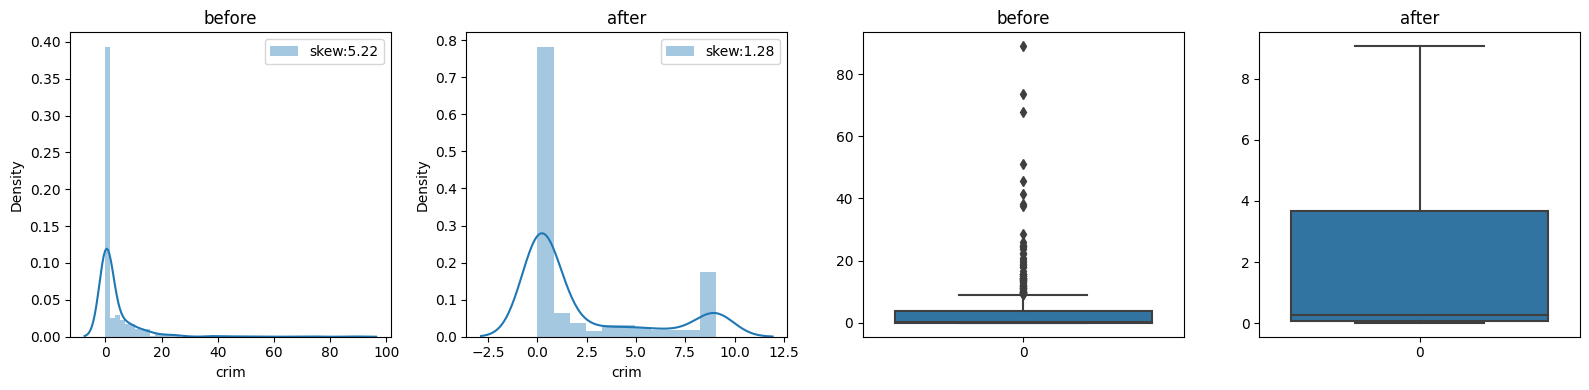

/tmp/ipykernel_43/3096991670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
/tmp/ipykernel_43/3096991670.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))


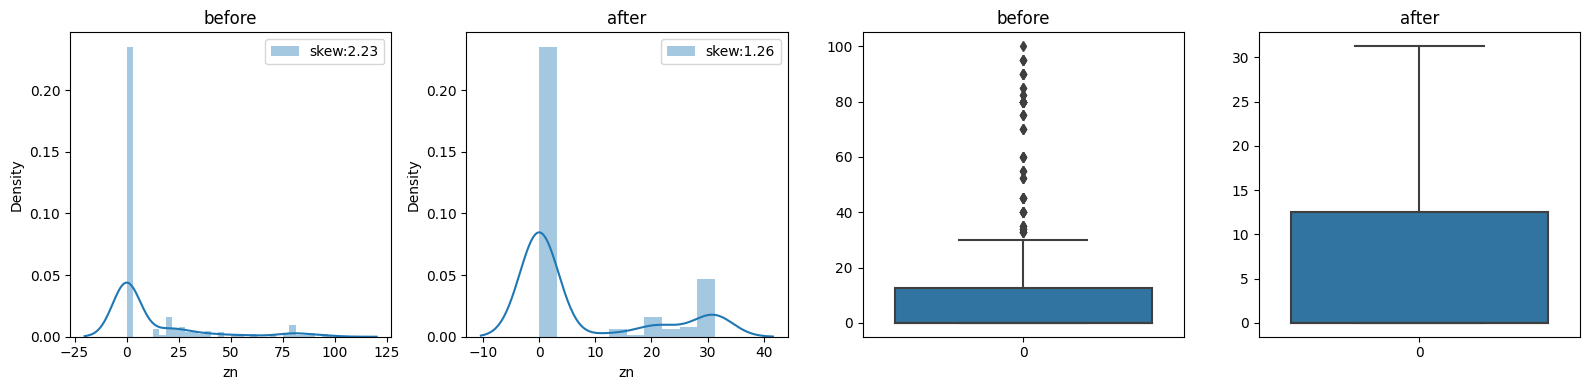

/tmp/ipykernel_43/3096991670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
/tmp/ipykernel_43/3096991670.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))


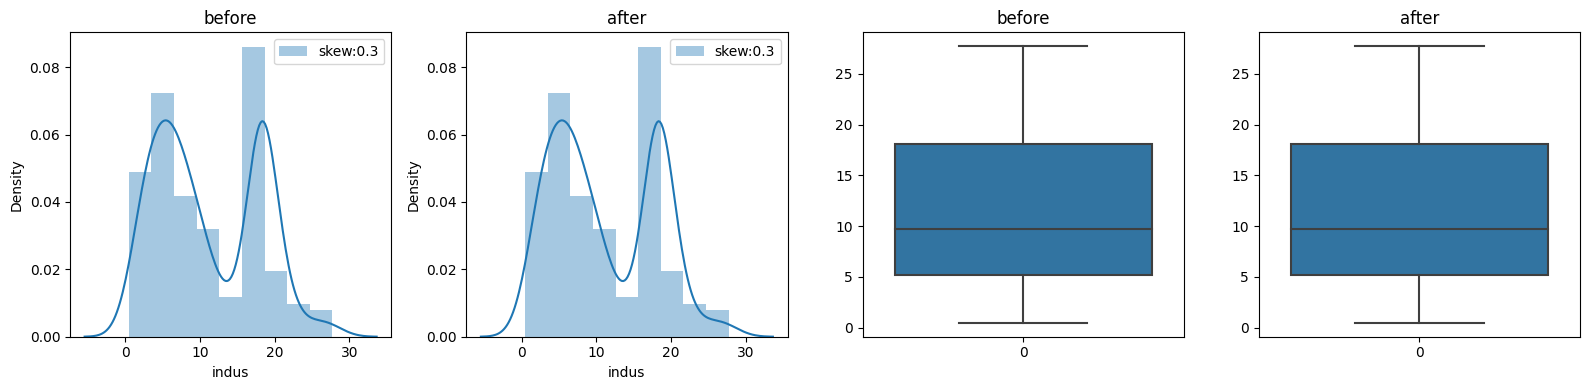

/tmp/ipykernel_43/3096991670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
/tmp/ipykernel_43/3096991670.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))
/opt/conda/lib/python3.

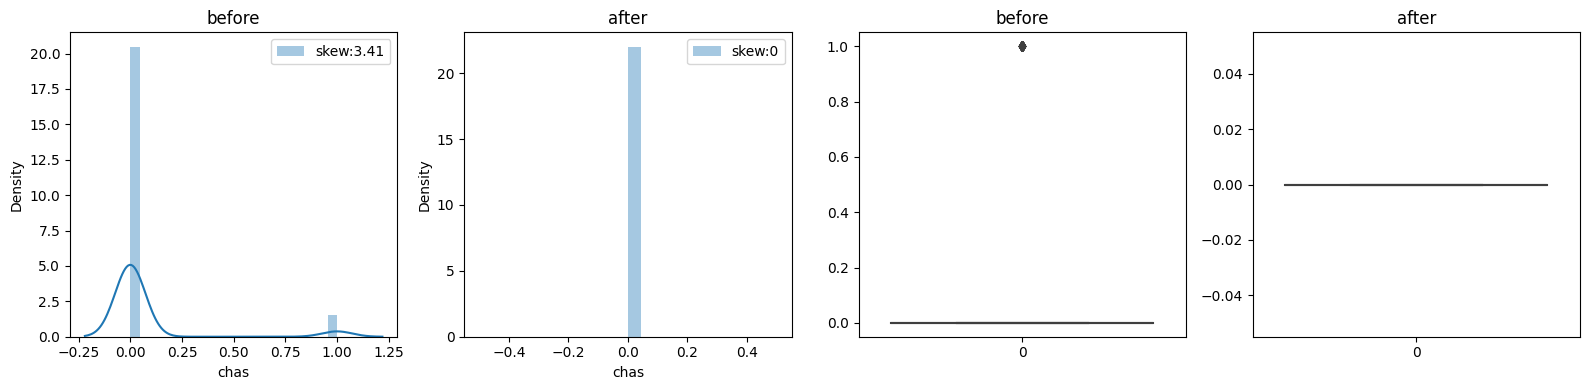

/tmp/ipykernel_43/3096991670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
/tmp/ipykernel_43/3096991670.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))


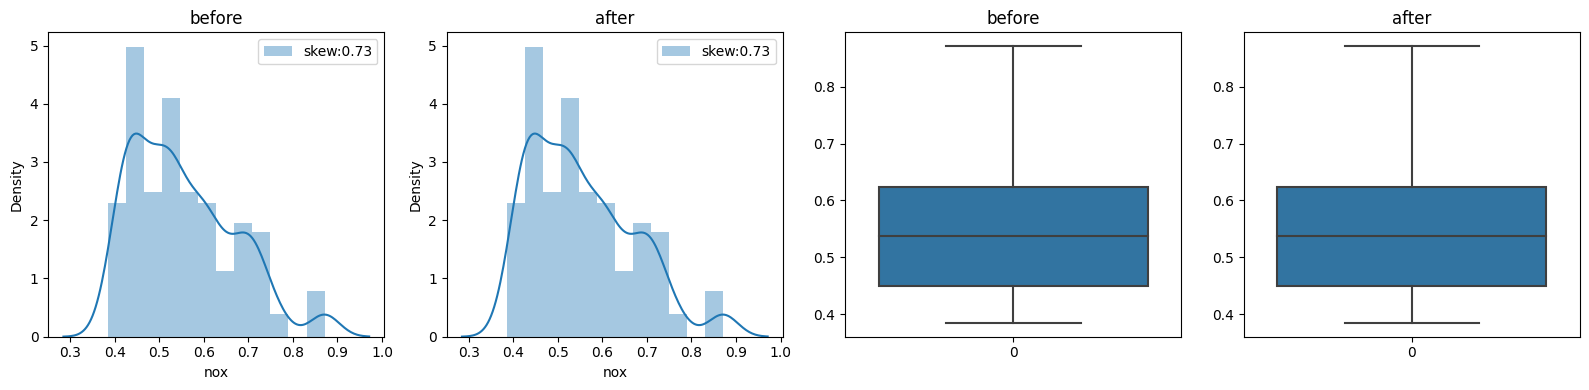

/tmp/ipykernel_43/3096991670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
/tmp/ipykernel_43/3096991670.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))


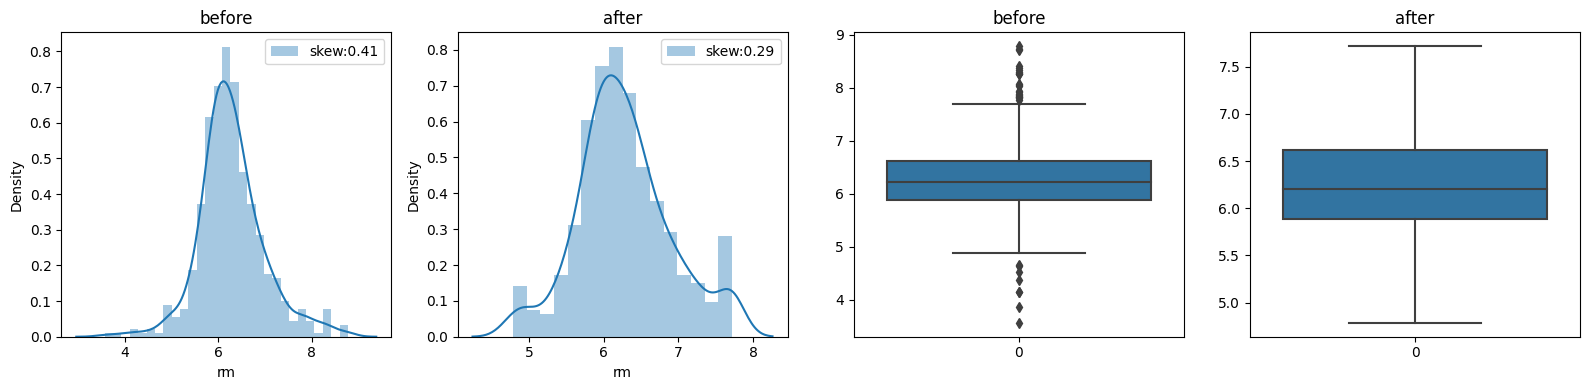

/tmp/ipykernel_43/3096991670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
/tmp/ipykernel_43/3096991670.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))


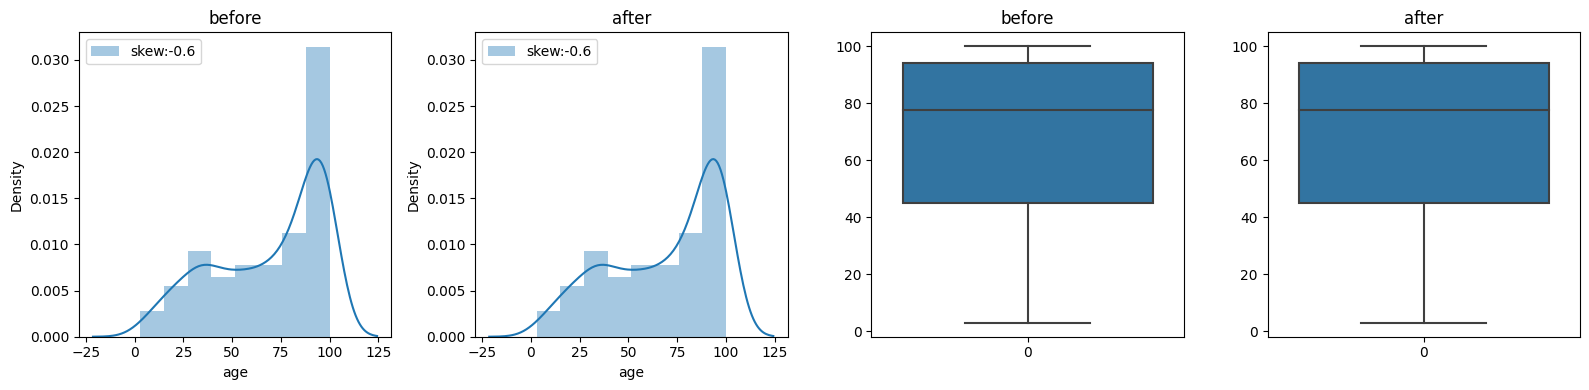

/tmp/ipykernel_43/3096991670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
/tmp/ipykernel_43/3096991670.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))


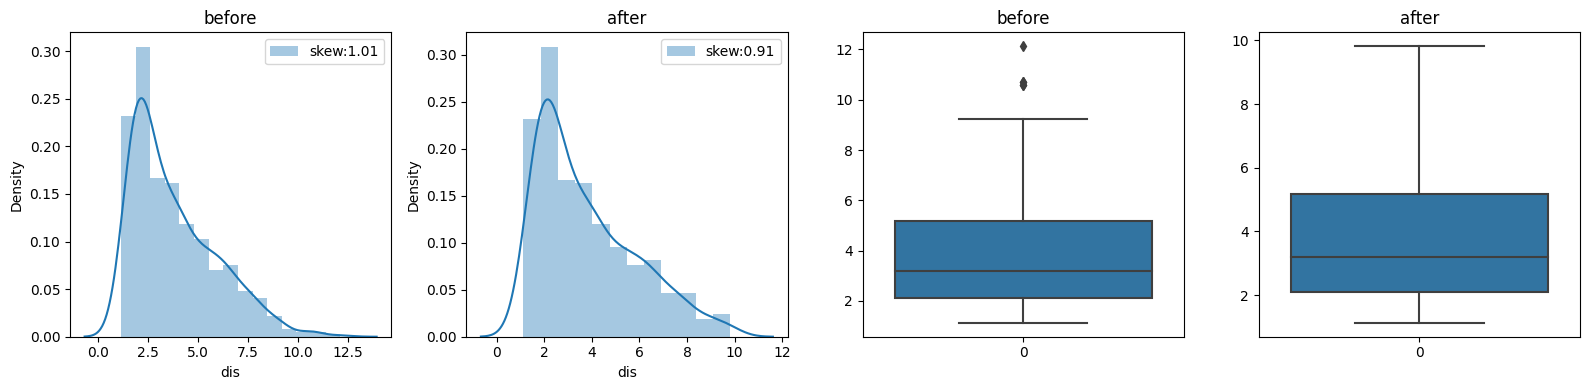

/tmp/ipykernel_43/3096991670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
/tmp/ipykernel_43/3096991670.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))


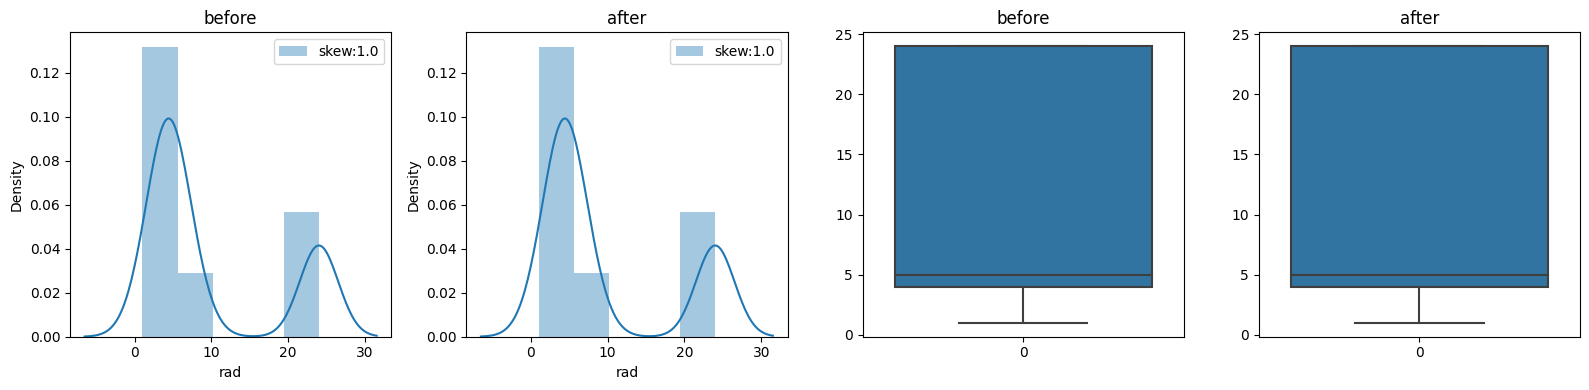

/tmp/ipykernel_43/3096991670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
/tmp/ipykernel_43/3096991670.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))


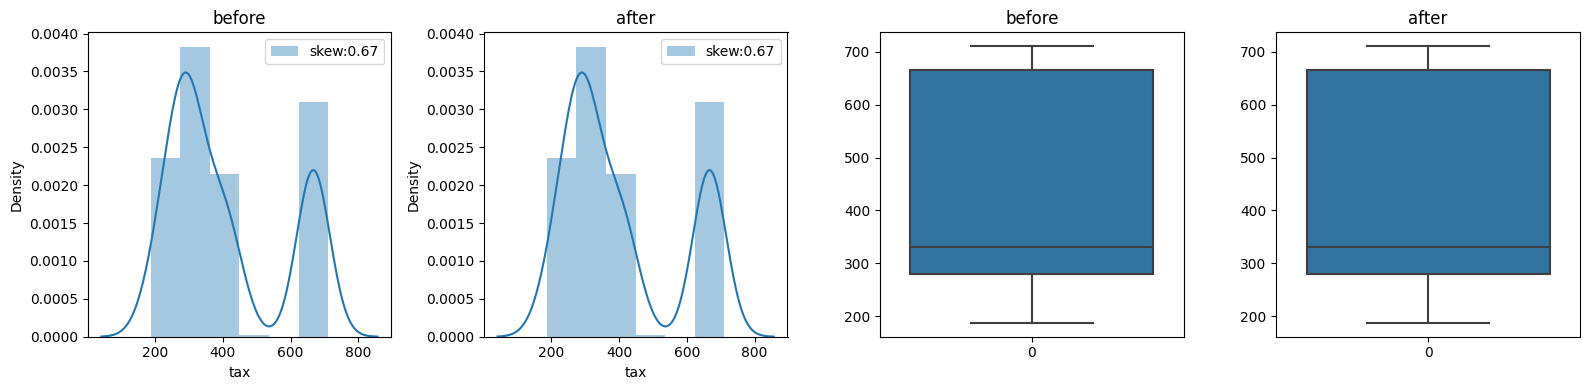

/tmp/ipykernel_43/3096991670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
/tmp/ipykernel_43/3096991670.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))


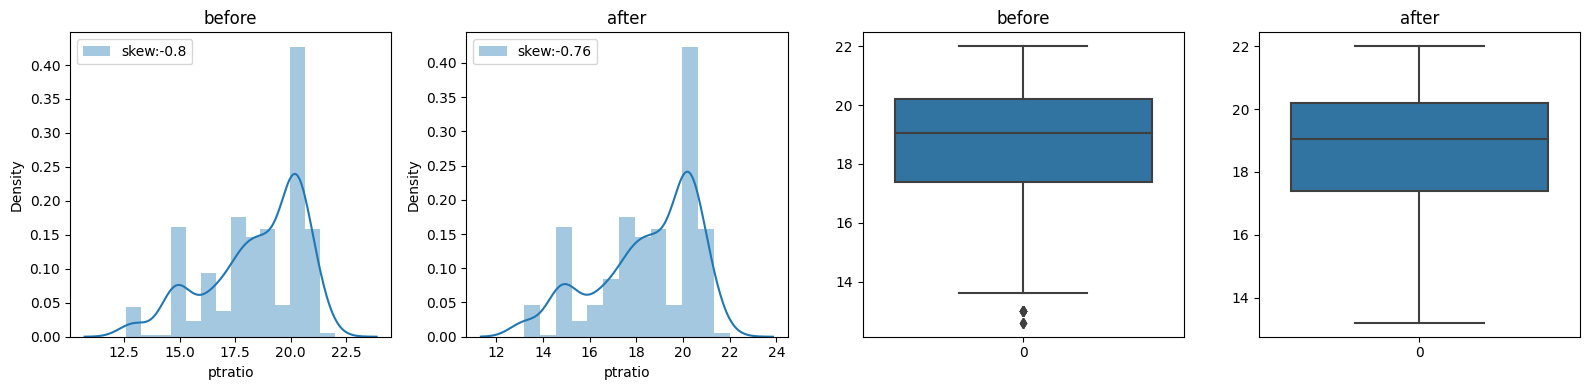

/tmp/ipykernel_43/3096991670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
/tmp/ipykernel_43/3096991670.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))


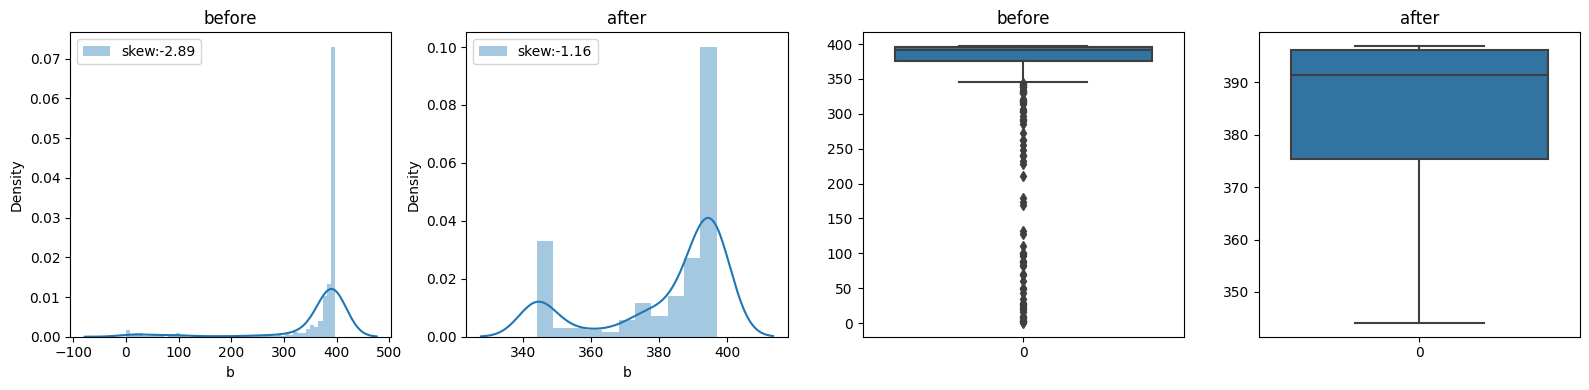

/tmp/ipykernel_43/3096991670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
/tmp/ipykernel_43/3096991670.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))


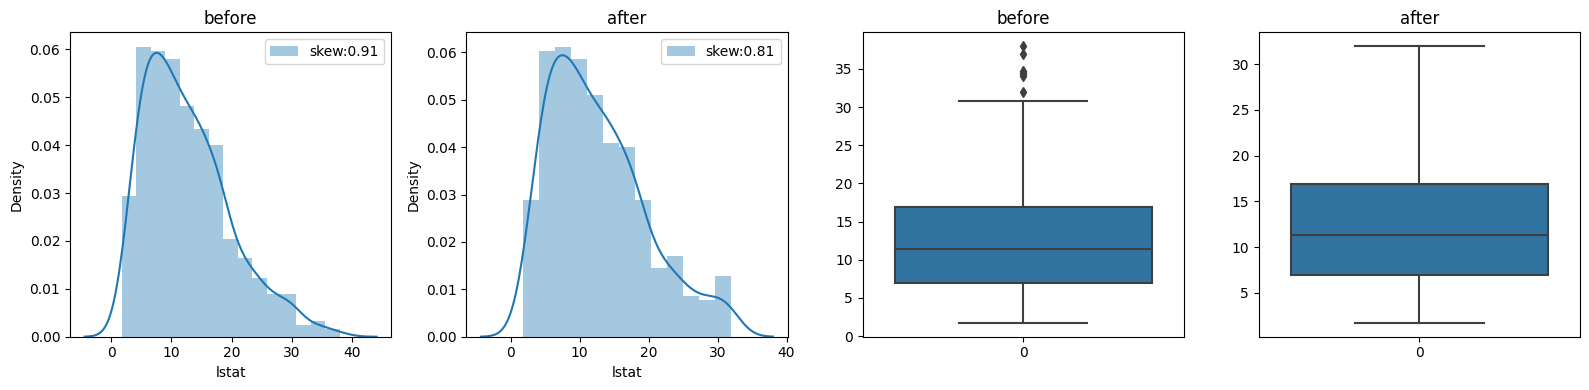

/tmp/ipykernel_43/3096991670.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
/tmp/ipykernel_43/3096991670.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))


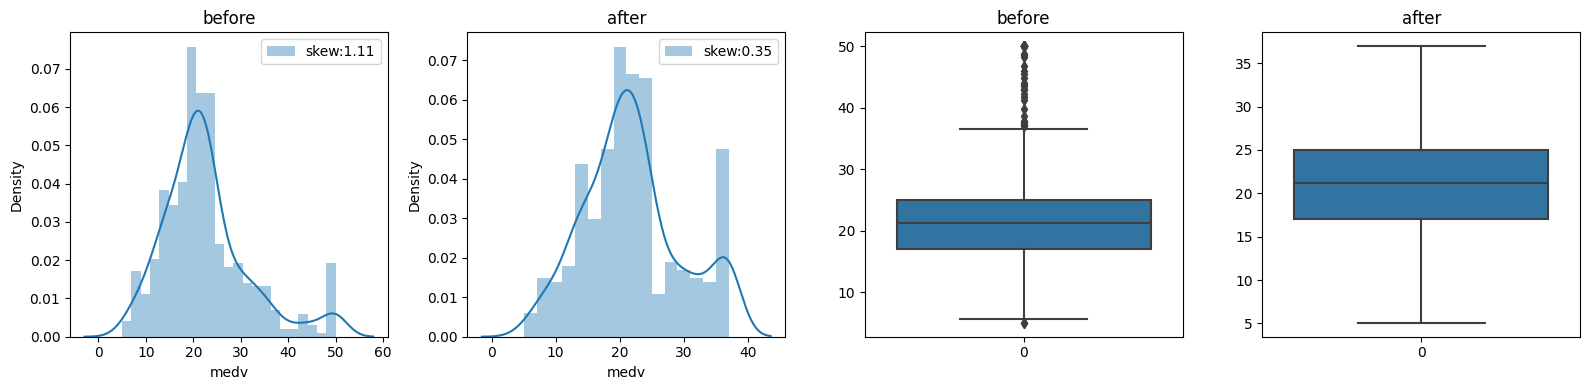

In [20]:
for i in df_cap.columns:
    
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[i],label="skew:"+str(np.round(df[i].skew(),2)))
    plt.title('before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[i],label="skew:"+str(np.round(df_cap[i].skew(),2)))
    plt.title('after')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[i])
    plt.title('before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[i])
    plt.title('after')
    
    plt.tight_layout()
    plt.show()

In [21]:
X=df_cap.drop('medv',axis=1)

In [22]:
Y=df['medv']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [24]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
484,2.378570,0.00,18.10,0.0,0.583,5.871000,41.9,3.7240,24.0,666.0,20.2,370.73000,13.34
191,0.069110,31.25,3.44,0.0,0.437,6.739000,30.8,6.4798,5.0,398.0,15.2,389.71000,4.69
366,3.696950,0.00,18.10,0.0,0.718,4.963000,91.4,1.7523,24.0,666.0,20.2,344.10625,14.00
322,0.351140,0.00,7.38,0.0,0.493,6.041000,49.9,4.7211,5.0,287.0,19.6,396.90000,7.70
222,0.623560,0.00,6.20,0.0,0.507,6.879000,77.7,3.2721,8.0,307.0,17.4,390.39000,9.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.054970,0.00,5.19,0.0,0.515,5.985000,45.4,4.8122,5.0,224.0,20.2,396.90000,9.74
10,0.224890,12.50,7.87,0.0,0.524,6.284341,94.3,6.3467,5.0,311.0,15.2,392.52000,20.45
376,9.069639,0.00,18.10,0.0,0.671,6.649000,93.3,1.3449,24.0,666.0,20.2,363.02000,23.24
444,9.069639,0.00,18.10,0.0,0.740,5.854000,96.6,1.8956,24.0,666.0,20.2,344.10625,23.79


In [26]:
Y_train

484    20.6
191    30.5
366    21.9
322    20.4
222    27.5
       ... 
339    19.0
10     15.0
376    13.9
444    10.8
388    10.2
Name: medv, Length: 354, dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [28]:
sc.fit(X_train)

StandardScaler()

In [29]:
X_train_scale=sc.transform(X_train)
X_test_scale=sc.transform(X_test)

In [30]:
X_train_scale=pd.DataFrame(X_train_scale,columns=X.columns)
X_test_scale=pd.DataFrame(X_test_scale,columns=X.columns)

In [31]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [32]:
lr.fit(X_train,Y_train)

LinearRegression()

In [33]:
Y_pred=lr.predict(X_test)

In [34]:
Y_pred

array([14.84051152, 27.76206858,  9.96106672, 16.9468038 , 18.56042314,
       22.25559149, 13.51670013, 32.054463  , 17.01124026, 23.14332698,
        6.37301255, 36.24170559, 15.99999372, 22.42836631, 25.79681934,
       15.9602836 , 34.33677223, 12.47785534, 26.54090524, 19.25237362,
       18.88537039, 17.95675089, 25.90752668, 22.13257355, 20.90938641,
       15.07583659,  5.9613491 , 16.74126738, 16.90396698, 18.01449969,
       29.03888073, 18.27741111, 30.5806057 , 24.80451511, 22.34725482,
       31.01941779, 29.45948579, 34.18714964, 41.39305941, 13.75739486,
       29.35304632, 12.14492176, 16.09870622, 25.28919724, 34.43043112,
       37.63994298, 19.52717579, 16.04583794, 23.25116263, 30.34257735,
        5.43891473, 11.10153228,  8.37838901, 11.28346835, 22.58605697,
       20.88381587, 24.3828729 , 29.14986933, 18.81627785, 33.44820624,
       28.87233729, 23.12950236, 17.07905161, 34.38818815, 34.1612706 ,
       14.9299905 , 19.9935544 , 24.18086644, 27.0686157 , 19.62

In [35]:
from sklearn.metrics import mean_squared_error,r2_score

In [37]:
mse=mean_squared_error(Y_pred,Y_test)
Accuracy=r2_score(Y_pred,Y_test)

In [38]:
print("MSE:{}".format(mse))
print("Accuracy:{}".format(Accuracy))

MSE:26.327815671178566
Accuracy:0.5574479056688175
